<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd

Load the dataset into a dataframe.


In [92]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


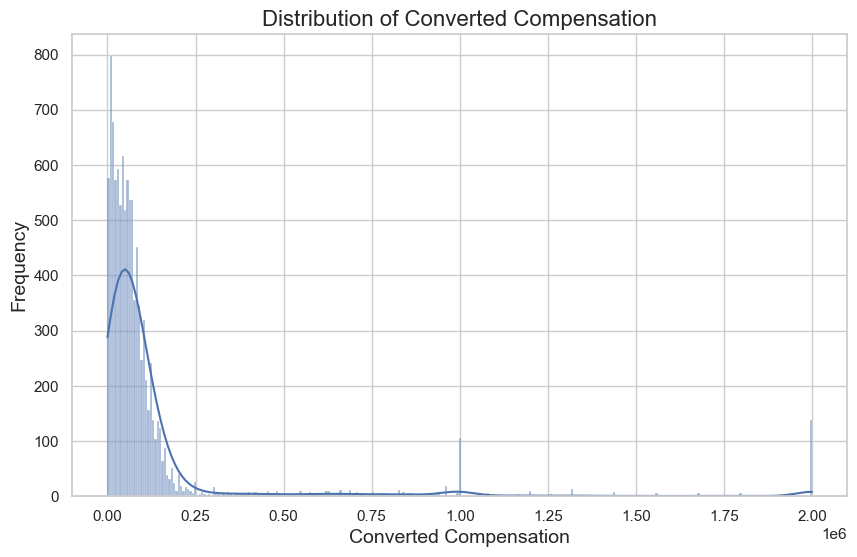

In [12]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution curve for the 'Converted Comp' column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the distribution
sns.histplot(df['ConvertedComp'], kde=True)

# Adding labels and title
plt.title('Distribution of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

Plot the distribution curve for the column `ConvertedComp`.


Plot the histogram for the column `ConvertedComp`.


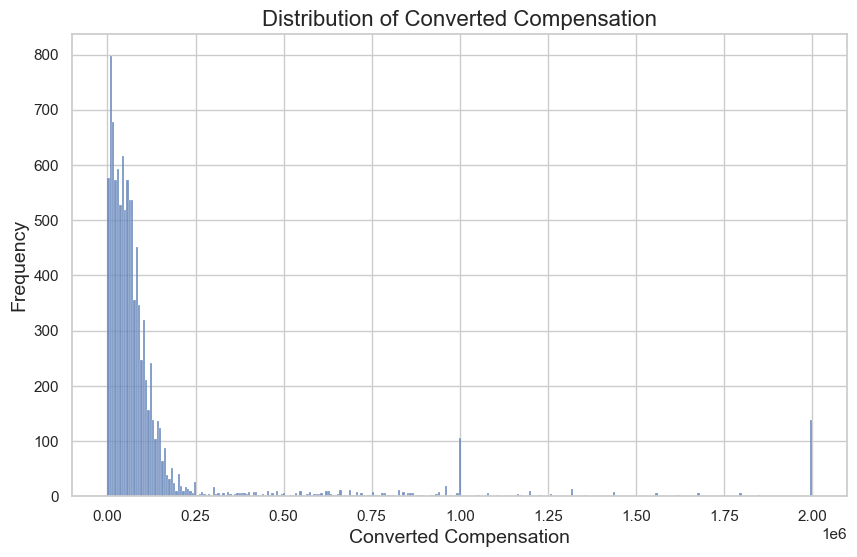

In [15]:
# your code goes here
# Plot the distribution curve for the 'Converted Comp' column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the distribution
sns.histplot(df['ConvertedComp'])

# Adding labels and title
plt.title('Distribution of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

What is the median of the column `ConvertedComp`?


In [18]:
# your code goes here
print(f'Median of the ConvertedComp Column is {df['ConvertedComp'].median()}')

Median of the ConvertedComp Column is 57745.0


How many responders identified themselves only as a **Man**?


In [23]:
# your code goes here
(df['Gender'] == 'Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:
# your code goes here
df_women = df[df['Gender'] == 'Woman']

# Calculate the median Converted Compensation for women
median_converted_comp_women = df_women['ConvertedComp'].median()

# Display the result
print(f"Median Converted Compensation for women: {median_converted_comp_women}")

Median Converted Compensation for women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [30]:
# your code goes here
# Calculate the five-number summary for the 'Converted Comp' column
five_num_summary = df['ConvertedComp'].describe(percentiles=[0.25, 0.5, 0.75])

# Extract the specific values
min_value = five_num_summary['min']
q1_value = five_num_summary['25%']
median_value = five_num_summary['50%']
q3_value = five_num_summary['75%']
max_value = five_num_summary['max']

# Display the result
print(f"Minimum: {min_value}")
print(f"Q1 (25th percentile): {q1_value}")
print(f"Median (50th percentile): {median_value}")
print(f"Q3 (75th percentile): {q3_value}")
print(f"Maximum: {max_value}")

Minimum: 0.0
Q1 (25th percentile): 26868.0
Median (50th percentile): 57745.0
Q3 (75th percentile): 100000.0
Maximum: 2000000.0


Plot a histogram of the column `Age`.


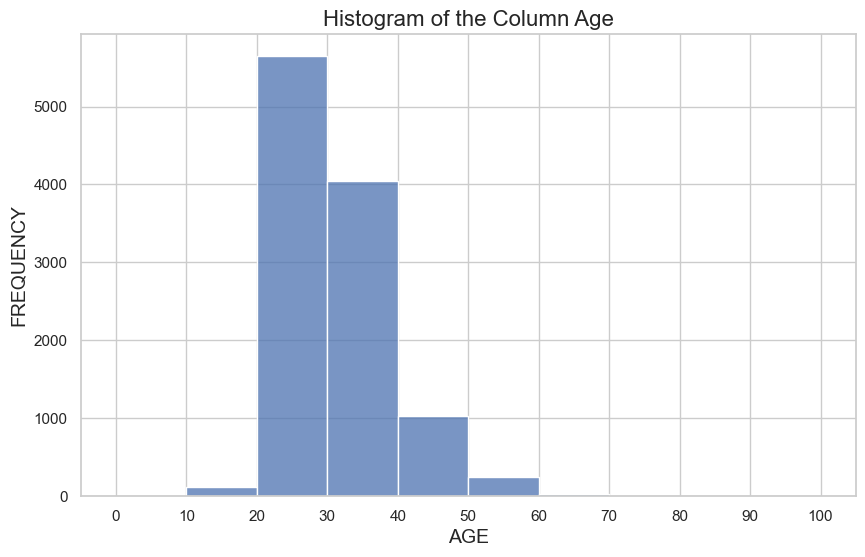

In [46]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Define custom bin edges
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(df['Age'], bins=bin_edges)

plt.title('Histogram of the Column Age', fontsize=16)
plt.xlabel('AGE', fontsize=14)
plt.ylabel('FREQUENCY', fontsize=14)

# Set xticks dynamically based on the bin edges
plt.xticks(bin_edges)

plt.show()

In [96]:
df['Age'].median()

29.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


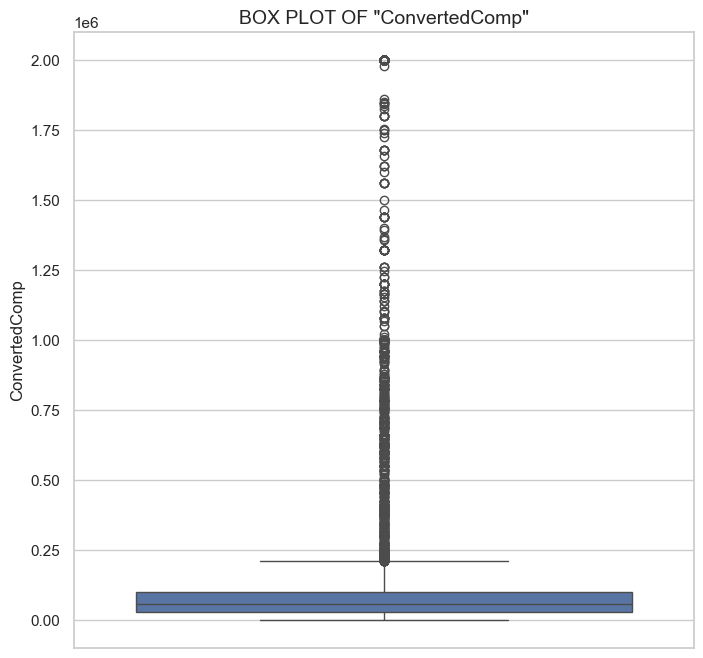

In [62]:
# your code goes here
sns.set(style = 'whitegrid')
plt.figure(figsize = (8,8))

sns.boxplot(df['ConvertedComp'])

plt.title('BOX PLOT OF "ConvertedComp"',fontsize = 14)
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [64]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print("Inter Quartile Range (IQR):", IQR)

Inter Quartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [66]:
# your code goes here
# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [68]:
# your code goes here
# Identify the outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in the ConvertedComp column:", num_outliers)


Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [70]:
# your code goes here
# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


### What is the median ConvertedComp after removing outliers?

In [103]:
print(f'Median of ConvertedComp after removing outliers is {df_no_outliers['ConvertedComp'].median()}')

median of ConvertedComp after removing outliers is 52704.0


### What is the mean ConvertedComp after removing outliers? 

In [109]:
print(f'Mean of ConvertedComp after removing outliers is {df_no_outliers['ConvertedComp'].mean()}')

Mean of ConvertedComp after removing outliers is 59883.20838915799


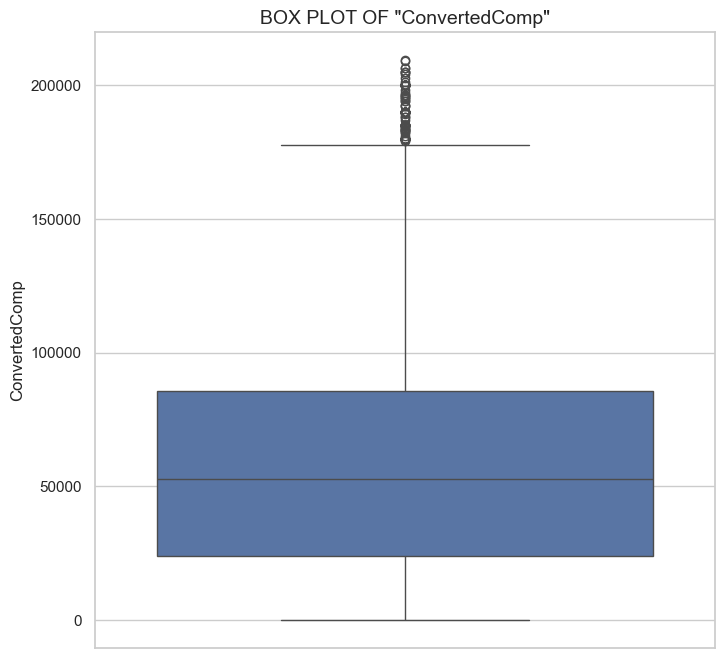

In [72]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (8,8))

sns.boxplot(df_no_outliers['ConvertedComp'])

plt.title('BOX PLOT OF "ConvertedComp"',fontsize = 14)
plt.show()

### Based on the boxplot of ‘Age’ how many outliers do you see below Q1

<Axes: ylabel='Age'>

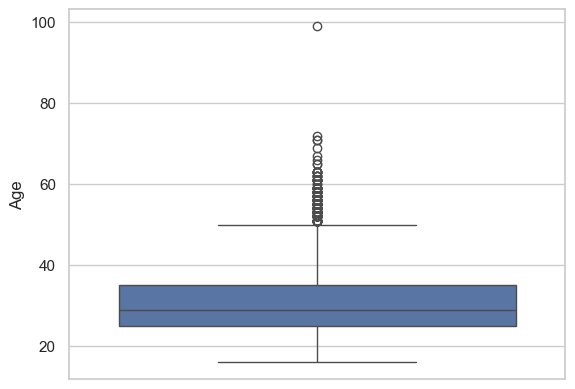

In [106]:
sns.boxplot(df['Age'])

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [90]:
# your code goes here

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Get the correlation between Age and all other numerical columns
age_correlations = correlation_matrix['Age']

print("Correlation between Age and other numerical columns:")
age_correlations

Correlation between Age and other numerical columns:


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
